In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('used_car_clean.csv')
df.head()

,brand,year,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(cc),max_power(bhp),seats,selling_price
0,Maruti,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000
1,Skoda,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000
2,Honda,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000
3,Hyundai,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000
4,Maruti,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000


In [3]:
df.groupby('brand').mean().sort_values(by = 'selling_price', ascending = False).iloc[0:11, -1]

brand
Lexus            5.150000e+06
BMW              4.109917e+06
Land             3.608333e+06
Volvo            3.272015e+06
Jaguar           2.915465e+06
Audi             2.612200e+06
Mercedes-Benz    2.470444e+06
Jeep             2.149613e+06
Isuzu            1.942000e+06
MG               1.783333e+06
Kia              1.504500e+06
Name: selling_price, dtype: float64

##### Evaluate how each categorical features are correlated to the selling_price 
    * We can use these information when encoding these categorical variables to avoid a sprase matrix from onehotencoding

In [4]:
df.groupby('seller_type').mean().sort_values(by = 'selling_price', ascending = False).iloc[0:10, -1].astype('int')

seller_type
Dealer              1443493
Trustmark Dealer     801838
Individual           498626
Name: selling_price, dtype: int32

In [5]:
df.groupby('fuel').mean().sort_values(by = 'selling_price', ascending = False).iloc[0:10, -1].astype('int')

fuel
Diesel    791619
Petrol    462441
CNG       301017
LPG       200421
Name: selling_price, dtype: int32

In [6]:
df.groupby('transmission').mean().sort_values(by = 'selling_price', ascending = False).iloc[0:10, -1].astype('int')

transmission
Automatic    1870827
Manual        455482
Name: selling_price, dtype: int32

In [7]:
df.groupby('owner').mean().sort_values(by = 'selling_price', ascending = False).iloc[0:10, -1].astype('int')

owner
Test Drive Car          4403800
First Owner              783086
Second Owner             392964
Third Owner              284425
Fourth & Above Owner     225813
Name: selling_price, dtype: int32

##### Brand Frequency Count, can be useful for "hashing"/addressing Curse of Dimensionality
    1.) Converted freq count to % just for this analysis, to show what percentage of the total cars are from which what  
    brand

In [8]:
brand_mapping = df['brand'].value_counts().to_dict()
df['brand_frequency_perc'] = df['brand'].map(brand_mapping) / 8127
df.head()

,brand,year,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(cc),max_power(bhp),seats,selling_price,brand_frequency_perc
0,Maruti,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000,0.301218
1,Skoda,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000,0.012920
2,Honda,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000,0.057463
3,Hyundai,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000,0.174111
4,Maruti,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000,0.301218


In [9]:
most_brands = df.groupby('brand').max().sort_values(by = 'brand_frequency_perc', ascending = False).iloc[0:31, -1]
sum(most_brands)

1.0

In [10]:
df['brand'].nunique()

31

In [11]:
most_brands.values

array([3.01218162e-01, 1.74110988e-01, 9.49920020e-02, 9.03162299e-02,
       6.00467577e-02, 5.74627784e-02, 4.88495140e-02, 2.83007260e-02,
       2.80546327e-02, 2.28866740e-02, 1.47655962e-02, 1.29198966e-02,
       9.96677741e-03, 8.73631106e-03, 8.24412452e-03, 7.99803125e-03,
       6.64451827e-03, 5.78319183e-03, 4.92186539e-03, 4.18358558e-03,
       3.81444567e-03, 1.72265289e-03, 7.38279808e-04, 7.38279808e-04,
       6.15233173e-04, 4.92186539e-04, 4.92186539e-04, 3.69139904e-04,
       3.69139904e-04, 1.23046635e-04, 1.23046635e-04])

##### Data Visualization
    1.) 10 highest averages by Brand
    2.) 10 lowest averages by Brand
    3.) Most frequent brand (top 15/31 already represents 96% of total cars, 20/31 - 99%)

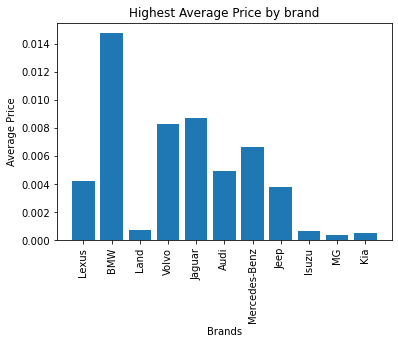

In [12]:
x = df.groupby('brand').mean().sort_values(by = 'selling_price', ascending = False).index[0:11]
y = df.groupby('brand').mean().sort_values(by = 'selling_price', ascending = False).iloc[0:11, -1]

plt.bar(x, y)
plt.title('Highest Average Price by brand')
plt.xlabel('Brands')
plt.ylabel('Average Price')
plt.ticklabel_format(style = 'sci', axis = 'y')
plt.xticks(x, rotation = 'vertical')
plt.show()

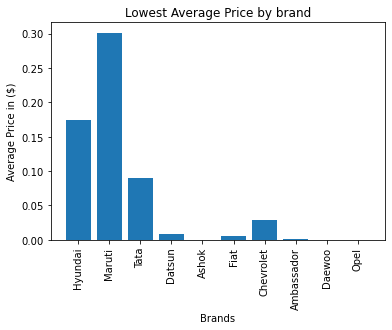

In [13]:
x = df.groupby('brand').mean().sort_values(by = 'selling_price', ascending = False).index[-10:]
y = df.groupby('brand').mean().sort_values(by = 'selling_price', ascending = False).iloc[-10:, -1]

plt.bar(x, y)
plt.title('Lowest Average Price by brand')
plt.xlabel('Brands')
plt.ylabel('Average Price in ($)')
plt.ticklabel_format(style = 'scientific', axis = 'y')
plt.xticks(x, rotation = 'vertical')
plt.show()

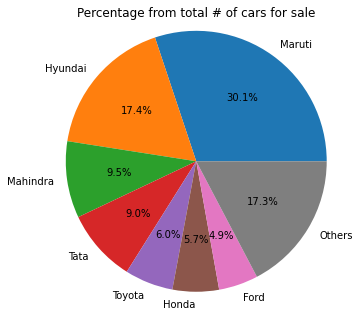

In [37]:
brand_w_others = most_brands[0:7]
brand_w_others['Others'] =  sum(most_brands[7:].values)
names = brand_w_others.index
values = brand_w_others.values

plt.pie(x = values, labels = names, radius = 1.5, autopct = '%0.1f%%')
plt.title('Percentage from total # of cars for sale\n\n')
plt.show()